##AE 339 Nozzle Design Assignment Group 7

Exit/Throat Area Ratio = 2.4031
Exit Mach Number = 2.4000
Calculations Complete!!
The nozzle contour will be shown below.


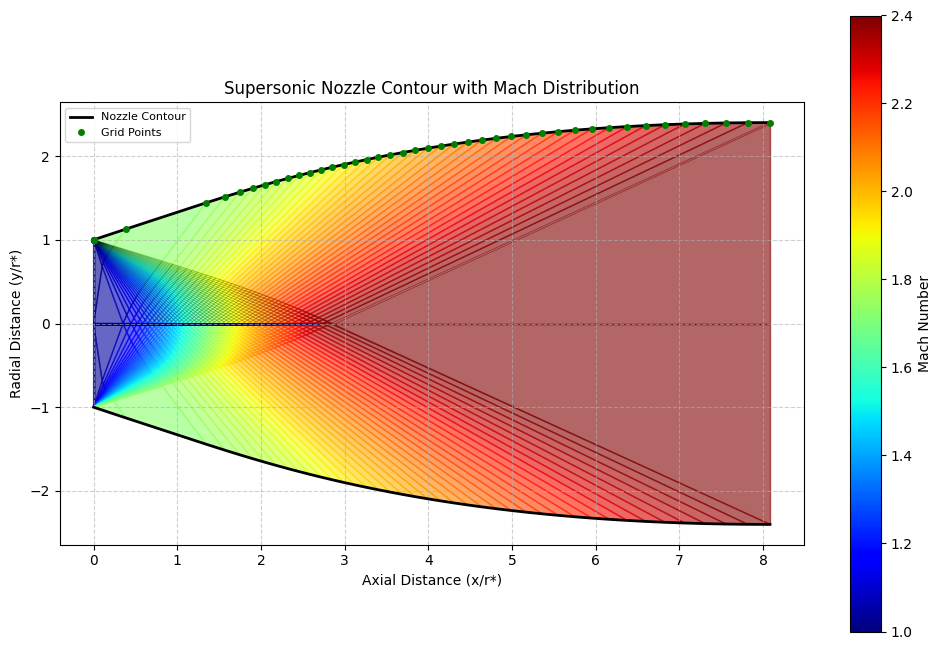

Visualization complete!


In [ ]:
##------------Nozzle_Design------------##
##--------------AE_339-----------------##

#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.collections import PathCollection
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from math import sqrt, asin, tan, radians, degrees

def prandtl_meyer_calc(target_prandtl_meyer_angle, M, specific_heat_ratio):   #Calculates the prandtl mayer angle for input mach number and gamma.
    if M == 0:
        if target_prandtl_meyer_angle < 0 or target_prandtl_meyer_angle > 130.454076:
            print("Prandtl-Meyer Angle must be between 0 and 130.454076 degrees.")
            return None
        def equation(M):
            target_prandtl_meyer_angle_rad = np.radians(target_prandtl_meyer_angle)
            term1 = np.sqrt((specific_heat_ratio + 1) / (specific_heat_ratio - 1)) * np.arctan(np.sqrt((specific_heat_ratio - 1) * (M ** 2 - 1) / (specific_heat_ratio + 1)))
            term2 = np.arctan(np.sqrt(M ** 2 - 1))
            return term1 - term2 - target_prandtl_meyer_angle_rad
        mach_solution = fsolve(equation, 2)
        return mach_solution[0]
    if target_prandtl_meyer_angle==0:
        return np.degrees(np.sqrt((specific_heat_ratio + 1) / (specific_heat_ratio - 1)) * np.arctan(np.sqrt((specific_heat_ratio - 1) * (M**2 - 1) / (specific_heat_ratio + 1))) - np.arctan(np.sqrt(M**2 - 1)))
 # Have made the use of f-solve method to solve the equations

##---------------------------------------------------------------------------------------------------------------

def area_mach_relation(M, specific_heat_ratio):
    result = (1 / M) * ((2 / (specific_heat_ratio + 1)) * (1 + (specific_heat_ratio - 1) * M**2 / 2)) ** ((specific_heat_ratio + 1) / (2 * (specific_heat_ratio - 1)))

    if np.isinf(result):
        print('Error in area_mach_relation calculation\n')
    return result

##---------------------------------------------------------------------------------------------------------------

#initializing parameters
throat_diameter = 2
initial_mach = 1
char_count = 40
specific_heat_ratio_gas = 1.4
gas_constant = 287
mesh_output = 0
target_exit_mach = 2.4

#area ratio and flow angles calculations
exit_area_ratio = area_mach_relation(target_exit_mach, specific_heat_ratio_gas)
max_angle = prandtl_meyer_calc(0, target_exit_mach, specific_heat_ratio_gas) / 2
angle_distribution = np.linspace(0, max_angle, char_count)

expanded_data = [[{} for _ in range(char_count + 1)] for _ in range(char_count)]
straight_data = [{} for _ in range(char_count)]

#calculating thermodynamic parameters
specific_heat_ratio_m1_half = (specific_heat_ratio_gas - 1) / 2
two_specific_heat_ratio_p1 = 2 / (specific_heat_ratio_gas + 1)
specific_heat_ratio_ratio = specific_heat_ratio_gas / (specific_heat_ratio_gas - 1)


print(f'Exit/Throat Area Ratio = {exit_area_ratio:.4f}')
print(f'Exit Mach Number = {target_exit_mach:.4f}')

##-------------------------------------------------------------------------------------------------------

#flow field parameters
for row in range(char_count):
    expanded_data[row][0]['mach'] = 0
    if row == 0:
        expanded_data[row][0]['mach'] = initial_mach

    expanded_data[row][0].update({
        'flow_angle': angle_distribution[row],
        'prandtl_meyer': 0,
        'mach_angle': 0,
        'char_plus': 0,
        'char_minus': 0,
        'x_coord': 0,
        'y_coord': 0,
        'slope': 0,
        'right_running': 0,
        'left_running': 0
    })
    expanded_data[row][0]['x_coord'] = 0
    expanded_data[row][0]['y_coord'] = throat_diameter / 2

for row in range(char_count):   #initializing for the rest of the flow field
    for col in range(1, char_count + 1):
        expanded_data[row][col].update({
            'mach': 0,
            'flow_angle': 0,
            'prandtl_meyer': 0,
            'mach_angle': 0,
            'char_plus': 0,
            'char_minus': 0,
            'x_coord': 0,
            'y_coord': 0,
            'slope': 0,
            'right_running': 0,
            'left_running': 0
        })

for col in range(char_count):  #initializing for straightening region
    straight_data[col].update({
        'mach': 0,
        'flow_angle': 0,
        'prandtl_meyer': 0,
        'mach_angle': 0,
        'char_plus': 0,
        'char_minus': 0,
        'x_coord': 0,
        'y_coord': 0,
        'slope': 0,
        'characteristic': 0,
        'right_running': 0,
        'left_running': 0
    })

expanded_data[0][0]['prandtl_meyer'] = prandtl_meyer_calc(0, expanded_data[0][0]['mach'], specific_heat_ratio_gas)

#the characteristic calculations for expansion region
for row in range(char_count):
    expanded_data[row][0]['char_plus'] = expanded_data[0][0]['flow_angle'] - expanded_data[0][0]['prandtl_meyer']

    if row != 0:
        expanded_data[row][0]['prandtl_meyer'] = expanded_data[row][0]['flow_angle'] - expanded_data[row][0]['char_plus']
        expanded_data[row][0]['mach'] = prandtl_meyer_calc(expanded_data[row][0]['prandtl_meyer'], 0, specific_heat_ratio_gas)

    expanded_data[row][0]['mach_angle'] = degrees(asin(1 / expanded_data[row][0]['mach']))
    expanded_data[row][0]['char_minus'] = expanded_data[row][0]['flow_angle'] + expanded_data[row][0]['prandtl_meyer']

#non simple region calculations
start_row = 0
for col in range(1, char_count + 1):
    for row in range(start_row, char_count):
        if col - 1 == row:
            expanded_data[row][col]['char_minus'] = expanded_data[row][0]['char_minus']
            expanded_data[row][col]['prandtl_meyer'] = expanded_data[row][col]['char_minus']
            expanded_data[row][col]['mach'] = prandtl_meyer_calc(expanded_data[row][col]['prandtl_meyer'], 0, specific_heat_ratio_gas)
            expanded_data[row][col]['mach_angle'] = degrees(asin(1 / expanded_data[row][col]['mach']))
            expanded_data[row][col]['char_plus'] = expanded_data[row][col]['flow_angle'] - expanded_data[row][col]['prandtl_meyer']
            expanded_data[row][col]['char_minus'] = expanded_data[row][col]['flow_angle'] + expanded_data[row][col]['prandtl_meyer']
        else:
            expanded_data[row][col]['char_plus'] = expanded_data[row - 1][col]['char_plus']
            expanded_data[row][col]['char_minus'] = expanded_data[row][col - 1]['char_minus']
            expanded_data[row][col]['flow_angle'] = 0.5 * (expanded_data[row][col]['char_minus'] + expanded_data[row][col]['char_plus'])
            expanded_data[row][col]['prandtl_meyer'] = 0.5 * (expanded_data[row][col]['char_minus'] - expanded_data[row][col]['char_plus'])
            expanded_data[row][col]['mach'] = prandtl_meyer_calc(expanded_data[row][col]['prandtl_meyer'], 0, specific_heat_ratio_gas)
            expanded_data[row][col]['mach_angle'] = degrees(asin(1 / expanded_data[row][col]['mach']))
    start_row += 1

#initializing straightening region calculations
straight_data[-1].update({
    'flow_angle': 0,
    'mach': expanded_data[-1][-1]['mach'],
    'prandtl_meyer': prandtl_meyer_calc(0, expanded_data[-1][-1]['mach'], specific_heat_ratio_gas),
})
straight_data[-1]['mach_angle'] = degrees(asin(1 / straight_data[-1]['mach']))
straight_data[-1]['char_plus'] = straight_data[-1]['flow_angle'] - straight_data[-1]['prandtl_meyer']
straight_data[-1]['char_minus'] = straight_data[-1]['flow_angle'] + straight_data[-1]['prandtl_meyer']

#calculating for the straightening region in the nozle
for idx in range(char_count - 1):
    straight_data[idx]['char_minus'] = straight_data[-1]['char_minus']
    straight_data[idx]['char_plus'] = expanded_data[idx][idx + 1]['char_plus']
    straight_data[idx]['flow_angle'] = 0.5 * (straight_data[idx]['char_minus'] + straight_data[idx]['char_plus'])
    straight_data[idx]['prandtl_meyer'] = 0.5 * (straight_data[idx]['char_minus'] - straight_data[idx]['char_plus'])
    straight_data[idx]['mach'] = prandtl_meyer_calc(straight_data[idx]['prandtl_meyer'], 0, specific_heat_ratio_gas)
    straight_data[idx]['mach_angle'] = degrees(asin(1 / straight_data[idx]['mach']))

##------------------------------------------------------------------------------------------------------------------------------

#nozzle geometry calculations
start_row = 0
for col in range(1, char_count + 1):
    for row in range(start_row, char_count):
        if col - 1 == row:
            expanded_data[row][col]['left_running'] = tan(0.5 * radians(
                (expanded_data[row][col-1]['flow_angle'] - expanded_data[row][col-1]['mach_angle']) +
                (expanded_data[row][col]['flow_angle'] - expanded_data[row][col]['mach_angle'])))
            expanded_data[row][col]['x_coord'] = expanded_data[row][col-1]['x_coord'] - (
                expanded_data[row][col-1]['y_coord'] / expanded_data[row][col]['left_running'])
        else:
            expanded_data[row][col]['left_running'] = tan(0.5 * radians(
                (expanded_data[row][col-1]['flow_angle'] - expanded_data[row][col-1]['mach_angle']) +
                (expanded_data[row][col]['flow_angle'] - expanded_data[row][col]['mach_angle'])))

            expanded_data[row][col]['right_running'] = tan(0.5 * radians(
                (expanded_data[row-1][col]['flow_angle'] + expanded_data[row-1][col]['mach_angle']) +
                (expanded_data[row][col]['flow_angle'] + expanded_data[row][col]['mach_angle'])))

            numerator = (expanded_data[row-1][col]['y_coord'] - expanded_data[row][col-1]['y_coord'] +
                        expanded_data[row][col]['left_running'] * expanded_data[row][col-1]['x_coord'] -
                        expanded_data[row][col]['right_running'] * expanded_data[row-1][col]['x_coord'])
            denominator = expanded_data[row][col]['left_running'] - expanded_data[row][col]['right_running']

            expanded_data[row][col]['x_coord'] = numerator / denominator
            expanded_data[row][col]['y_coord'] = (expanded_data[row][col-1]['y_coord'] +
                expanded_data[row][col]['left_running'] * (expanded_data[row][col]['x_coord'] -
                expanded_data[row][col-1]['x_coord']))
    start_row += 1

##-----------------------------------------------------------------------------------------------------------------

#straightening region geometry calculations
for idx in range(char_count):
    if idx == 0:
        straight_data[idx]['characteristic'] = tan(0.5 * radians(straight_data[idx]['flow_angle'] + expanded_data[char_count-1][0]['flow_angle']))
        straight_data[idx]['right_running'] = tan(radians(expanded_data[char_count-1][idx+1]['flow_angle'] + expanded_data[char_count-1][idx+1]['mach_angle']))


        numerator = (straight_data[idx]['characteristic'] * expanded_data[char_count-1][idx]['x_coord'] -
                    straight_data[idx]['right_running'] * expanded_data[char_count-1][idx+1]['x_coord'] -
                    expanded_data[char_count-1][idx]['y_coord'] +
                    expanded_data[char_count-1][idx+1]['y_coord'])
        denominator = straight_data[idx]['characteristic'] - straight_data[idx]['right_running']

        straight_data[idx]['x_coord'] = numerator / denominator
        straight_data[idx]['y_coord'] = (expanded_data[char_count-1][idx]['y_coord'] +
                                       straight_data[idx]['characteristic'] * (straight_data[idx]['x_coord'] -
                                       expanded_data[char_count-1][idx]['x_coord']))
    else:
        straight_data[idx]['characteristic'] = tan(0.5 * radians(straight_data[idx-1]['flow_angle'] +
                                                               straight_data[idx]['flow_angle']))
        straight_data[idx]['right_running'] = tan(radians(expanded_data[char_count-1][idx+1]['flow_angle'] +
                                                        expanded_data[char_count-1][idx+1]['mach_angle']))

        numerator = (straight_data[idx]['characteristic'] * straight_data[idx-1]['x_coord'] -
                    straight_data[idx]['right_running'] * expanded_data[char_count-1][idx+1]['x_coord'] -
                    straight_data[idx-1]['y_coord'] +
                    expanded_data[char_count-1][idx+1]['y_coord'])
        denominator = straight_data[idx]['characteristic'] - straight_data[idx]['right_running']

        straight_data[idx]['x_coord'] = numerator / denominator
        straight_data[idx]['y_coord'] = (straight_data[idx-1]['y_coord'] +
                                       straight_data[idx]['characteristic'] * (straight_data[idx]['x_coord'] -
                                       straight_data[idx-1]['x_coord']))

print('Calculations Complete!!')
print('The nozzle contour will be shown below.')

##---------------------------------------------------------------------------------------------------------------------

#visualization part
fig, ax = plt.subplots(figsize=(12, 8))
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xlabel('Axial Distance (x/r*)', fontsize=10)
ax.set_ylabel('Radial Distance (y/r*)', fontsize=10)
ax.set_title('Supersonic Nozzle Contour with Mach Distribution', fontsize=12)

#defining throat section geometry
throat_section = np.array([
    [0, throat_diameter/2, initial_mach],
    [0, -throat_diameter/2, initial_mach],
    [expanded_data[0][1]['x_coord'], expanded_data[0][1]['y_coord'], initial_mach]
])

#defining exit section geometry
exit_section = np.array([
    [expanded_data[char_count-1][char_count]['x_coord'],
     expanded_data[char_count-1][char_count]['y_coord'],
     expanded_data[char_count-1][char_count]['mach']],
    [straight_data[char_count-1]['x_coord'], 0,
     straight_data[char_count-1]['mach']],
    [straight_data[char_count-1]['x_coord'],
     straight_data[char_count-1]['y_coord'],
     straight_data[char_count-1]['mach']]
])

#create contour for Mach numbers
mach_normalize = Normalize(vmin=initial_mach, vmax=straight_data[char_count-1]['mach'])
color_map = plt.get_cmap('jet')

#plotting colored sections
def plot_colored_section(points, mirror=True):
    ax.fill(points[:, 0], points[:, 1], color=color_map(mach_normalize(np.mean(points[:, 2]))), alpha=0.6)
    if mirror:
        ax.fill(points[:, 0], -points[:, 1], color=color_map(mach_normalize(np.mean(points[:, 2]))), alpha=0.6)

plot_colored_section(exit_section)
plot_colored_section(throat_section)

#plotting characteristic mesh regions
for row in range(char_count - 1):
    for col in range(char_count):
        if row == col - 1:
            mesh_points = np.array([
                [expanded_data[row][col]['x_coord'], expanded_data[row][col]['y_coord'],
                 expanded_data[row][col]['mach']],
                [expanded_data[row+1][col]['x_coord'], expanded_data[row+1][col]['y_coord'],
                 expanded_data[row+1][col]['mach']],
                [expanded_data[row+1][col+1]['x_coord'], expanded_data[row+1][col+1]['y_coord'],
                 expanded_data[row+1][col+1]['mach']]
            ])
        else:
            mesh_points = np.array([
                [expanded_data[row][col]['x_coord'], expanded_data[row][col]['y_coord'],
                 expanded_data[row][col]['mach']],
                [expanded_data[row+1][col]['x_coord'], expanded_data[row+1][col]['y_coord'],
                 expanded_data[row+1][col]['mach']],
                [expanded_data[row+1][col+1]['x_coord'], expanded_data[row+1][col+1]['y_coord'],
                 expanded_data[row+1][col+1]['mach']],
                [expanded_data[row][col+1]['x_coord'], expanded_data[row][col+1]['y_coord'],
                 expanded_data[row][col+1]['mach']]
            ])
        plot_colored_section(mesh_points)

#plotting straightening region
for col in range(char_count):
    if col == 0:
        straight_points = np.array([
            [expanded_data[char_count-1][col]['x_coord'],
             expanded_data[char_count-1][col]['y_coord'],
             expanded_data[char_count-1][col]['mach']],
            [straight_data[col]['x_coord'], straight_data[col]['y_coord'],
             straight_data[col]['mach']],
            [expanded_data[char_count-1][col+1]['x_coord'],
             expanded_data[char_count-1][col+1]['y_coord'],
             expanded_data[char_count-1][col+1]['mach']]
        ])
    else:
        straight_points = np.array([
            [expanded_data[char_count-1][col]['x_coord'],
             expanded_data[char_count-1][col]['y_coord'],
             expanded_data[char_count-1][col]['mach']],
            [straight_data[col-1]['x_coord'], straight_data[col-1]['y_coord'],
             straight_data[col-1]['mach']],
            [straight_data[col]['x_coord'], straight_data[col]['y_coord'],
             straight_data[col]['mach']],
            [expanded_data[char_count-1][col+1]['x_coord'],
             expanded_data[char_count-1][col+1]['y_coord'],
             expanded_data[char_count-1][col+1]['mach']]
        ])
    plot_colored_section(straight_points)

#plotting the nozzle contour
contour_x = []
contour_y = []

for row in range(char_count):
    contour_x.append(expanded_data[row][0]['x_coord'])
    contour_y.append(expanded_data[row][0]['y_coord'])

for col in range(char_count):
    contour_x.append(straight_data[col]['x_coord'])
    contour_y.append(straight_data[col]['y_coord'])

#plotting for the nozzle contour lines
ax.plot(contour_x, contour_y, 'k-', linewidth=2, label='Nozzle Contour')
ax.plot(contour_x, [-y for y in contour_y], 'k-', linewidth=2)

#finally, plotting for the characteristic lines
def plot_characteristics():
    for row in range(char_count):
        x_coords = []
        y_coords = []
        for col in range(row + 1):
            if 'x_coord' in expanded_data[row][col]:
                x_coords.append(expanded_data[row][col]['x_coord'])
                y_coords.append(expanded_data[row][col]['y_coord'])
        ax.plot(x_coords, y_coords, 'k-', linewidth=0.5, alpha=0.3)

    for col in range(1, char_count):
        x_coords = []
        y_coords = []
        for row in range(col - 1, char_count):
            if 'x_coord' in expanded_data[row][col]:
                x_coords.append(expanded_data[row][col]['x_coord'])
                y_coords.append(expanded_data[row][col]['y_coord'])
        ax.plot(x_coords, y_coords, 'k-', linewidth=0.5, alpha=0.3)

plot_characteristics()
colorbar = plt.colorbar(ScalarMappable(norm=mach_normalize, cmap=color_map), ax=ax)
colorbar.set_label('Mach Number', fontsize=10)
ax.plot(contour_x, contour_y, 'go', markersize=4, label='Grid Points')
ax.set_aspect('equal')
ax.legend(fontsize=8)

plt.show()

print('Visualization complete!')